In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('data/df2.csv') 
data.rename(columns = {'yj13.2':'ЗП',
                     'yj72.18a':'Образование',
                     'yj6.2':'РабочаяНеделя',
                     'yj10.2':'Премия',
                     'yj21b':'Отпуск',
                     'yj1.1.1': 'Удовлетворенность'}, 
                     inplace = True)
data

,Отпуск,РабочаяНеделя,Премия,ЗП,Удовлетворенность,Образование
0,42.0,40.0,11572.206741,25000.0,3.0,2.0
1,21.0,60.0,8205.665614,18000.0,4.0,2.0
2,19.0,48.0,4229.458428,30000.0,4.0,1.0
3,28.0,40.0,2053.307000,38000.0,1.0,3.0
4,28.0,40.0,4102.242173,40000.0,1.0,3.0
...,...,...,...,...,...,...
3397,28.0,48.0,12988.193531,30000.0,2.0,2.0
3398,27.0,60.0,5183.598416,35000.0,3.0,1.0
3399,14.0,40.0,8382.187148,20000.0,3.0,2.0
3400,28.0,40.0,8167.341087,53000.0,2.0,2.0


### Генерация полиномиальных комбинаций признаков 

In [4]:
def generate_polynomial_features(data, degree=2):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(data)
    feature_names = poly.get_feature_names_out(data.columns)
    return pd.DataFrame(poly_features, columns=feature_names)

In [5]:
# Масштабирование данных 
X = data.loc[:, ['Отпуск', 'РабочаяНеделя', 'Премия', 'ЗП', 'Образование']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
data_scaled = pd.concat([X_scaled, data['Удовлетворенность']], axis=1)

# Добавление полиномиальных признаков 
data_polynom = generate_polynomial_features(data_scaled.loc[:, ['Отпуск', 'РабочаяНеделя', 'Премия', 'ЗП', 'Образование']], degree=3)
data_polynom

,Отпуск,РабочаяНеделя,Премия,ЗП,Образование,Отпуск^2,Отпуск РабочаяНеделя,Отпуск Премия,Отпуск ЗП,Отпуск Образование,...,Премия^3,Премия^2 ЗП,Премия^2 Образование,Премия ЗП^2,Премия ЗП Образование,Премия Образование^2,ЗП^3,ЗП^2 Образование,ЗП Образование^2,Образование^3
0,1.739915,-0.402246,1.326231,-0.142256,-0.308984,3.027303,-0.699874,2.307530,-0.247514,-0.537606,...,2.332695,-0.250213,-0.543469,0.026839,0.058294,0.126617,-0.002879,-0.006253,-0.013581,-0.029499
1,-0.813767,2.854786,0.518312,-0.710162,-0.308984,0.662216,-2.323129,-0.421785,0.577906,0.251441,...,0.139243,-0.190783,-0.083008,0.261400,0.113732,0.049484,-0.358156,-0.155830,-0.067800,-0.029499
2,-1.056974,0.900566,-0.435919,0.263391,-1.845772,1.117195,-0.951876,0.460755,-0.278397,1.950934,...,-0.082835,0.050051,-0.350743,-0.030242,0.211926,-1.485121,0.018273,-0.128050,0.897339,-6.288318
3,0.037461,-0.402246,-0.958162,0.912426,1.227805,0.001403,-0.015068,-0.035893,0.034180,0.045994,...,-0.879665,0.837676,1.127217,-0.797690,-1.073411,-1.444434,0.759614,1.022173,1.375486,1.850921
4,0.037461,-0.402246,-0.466449,1.074685,1.227805,0.001403,-0.015068,-0.017473,0.040258,0.045994,...,-0.101487,0.233824,0.267139,-0.538723,-0.615480,-0.703173,1.241204,1.418049,1.620092,1.850921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,0.037461,0.900566,1.666047,0.263391,-0.308984,0.001403,0.033736,0.062411,0.009867,-0.011575,...,4.624468,0.731097,-0.857651,0.115581,-0.135589,0.159059,0.018273,-0.021436,0.025146,-0.029499
3398,-0.084143,2.854786,-0.206939,0.669038,-1.845772,0.007080,-0.240211,0.017413,-0.056295,0.155309,...,-0.008862,0.028651,-0.079043,-0.092628,0.255547,-0.705016,0.299469,-0.826189,2.279328,-6.288318
3399,-1.664994,-0.402246,0.560674,-0.547903,-0.308984,2.772204,0.669738,-0.933519,0.912256,0.514456,...,0.176251,-0.172237,-0.097131,0.168313,0.094918,0.053528,-0.164480,-0.092756,-0.052309,-0.029499
3400,0.037461,-0.402246,0.509114,2.129367,-0.308984,0.001403,-0.015068,0.019072,0.079767,-0.011575,...,0.131961,0.551927,-0.080088,2.308428,-0.334967,0.048606,9.654981,-1.400996,0.203293,-0.029499


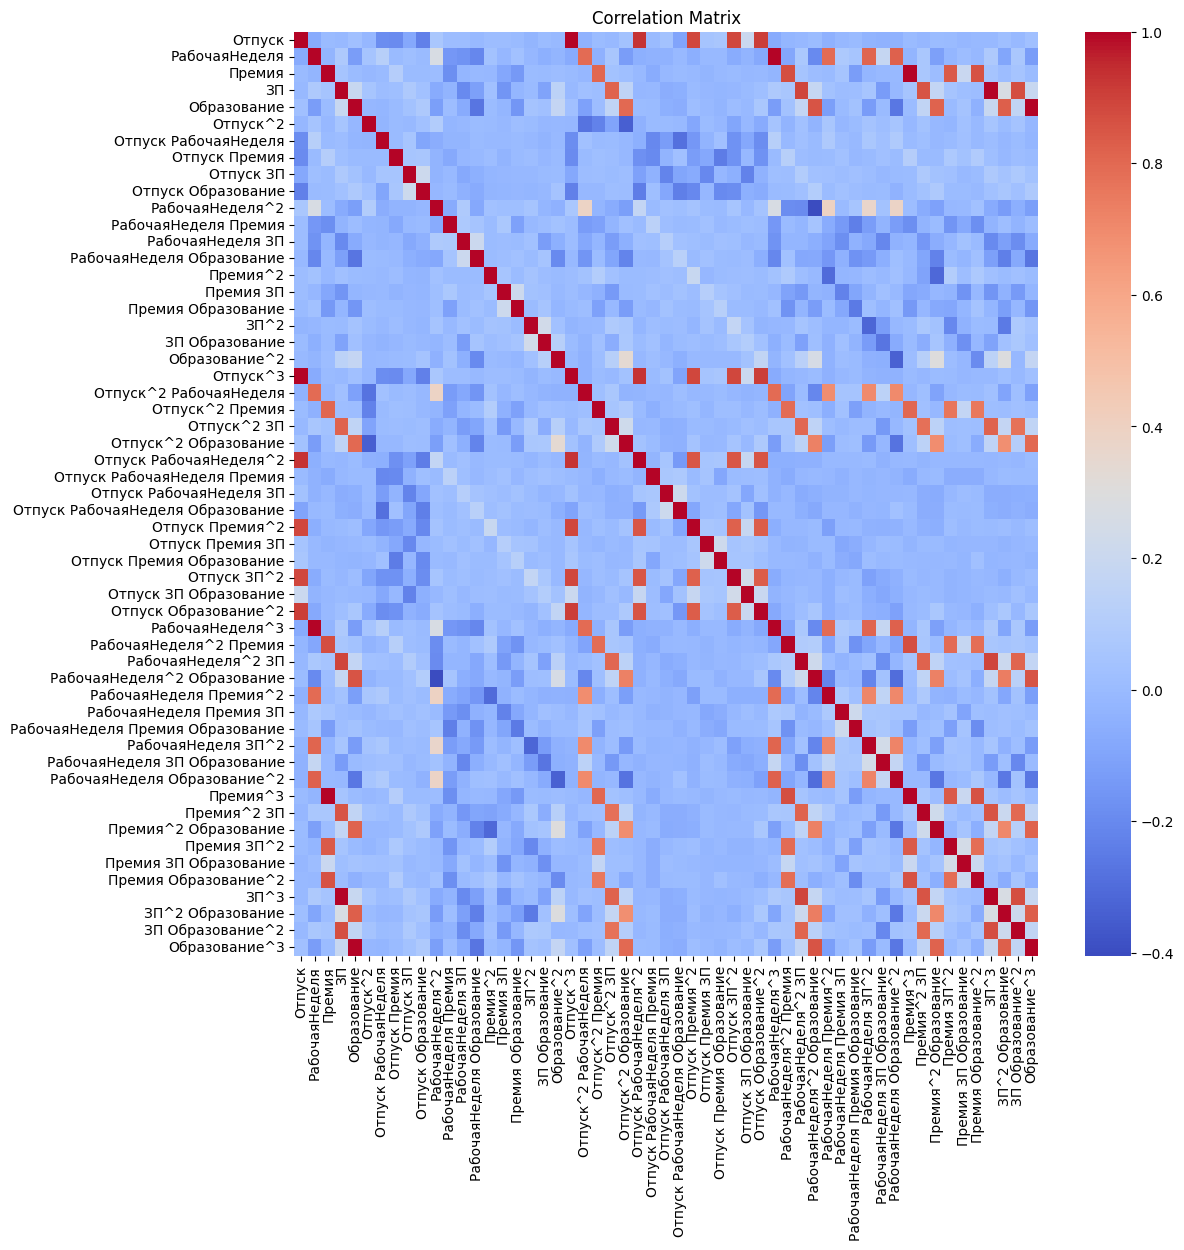

In [6]:
# Построение матрицы корреляции
# Используется коэффициент корреляции Спирмена, так как данные имеют нелинейную свзяь 
correlation_matrix = data_polynom.corr(method='spearman')

# Вывод матрицы
# print(correlation_matrix)

# Визуализация матрицы корреляции с помощью heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", xticklabels=True)
plt.title("Correlation Matrix")
plt.show()

### Преобразование непрерывных признаков в категориальные 

In [7]:
def bin_and_discretize_feature(data, columns, bins):
    data = data.copy()
    for column, bin in zip(columns, bins):
        data[f"{column}_binned"] = pd.cut(data[column], bins=bin, labels=[i+1 for i in range(bin)])
    return data

In [8]:
data_binned = bin_and_discretize_feature(data, ['ЗП', 'Премия', 'Отпуск'], [5, 5, 5])
data_binned

,Отпуск,РабочаяНеделя,Премия,ЗП,Удовлетворенность,Образование,ЗП_binned,Премия_binned,Отпуск_binned
0,42.0,40.0,11572.206741,25000.0,3.0,2.0,2,3,4
1,21.0,60.0,8205.665614,18000.0,4.0,2.0,2,3,2
2,19.0,48.0,4229.458428,30000.0,4.0,1.0,3,2,2
3,28.0,40.0,2053.307000,38000.0,1.0,3.0,3,1,3
4,28.0,40.0,4102.242173,40000.0,1.0,3.0,3,1,3
...,...,...,...,...,...,...,...,...,...
3397,28.0,48.0,12988.193531,30000.0,2.0,2.0,3,4,3
3398,27.0,60.0,5183.598416,35000.0,3.0,1.0,3,2,3
3399,14.0,40.0,8382.187148,20000.0,3.0,2.0,2,3,1
3400,28.0,40.0,8167.341087,53000.0,2.0,2.0,4,3,3


### Отбираем признаки с помощью метода Lasso 

In [9]:
def perform_lasso_selection(data, target, alpha):
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(data, target)
    model = SelectFromModel(lasso, prefit=True)
    return data.columns[model.get_support()].tolist()

In [14]:
columns = perform_lasso_selection(data_polynom, data['Удовлетворенность'], alpha=0.05)
data_lasso = pd.DataFrame()
for column in columns:
    data_lasso[column] = data_polynom[column]

data_lasso = pd.concat([data_lasso, data['Удовлетворенность']], axis=1)

data_lasso.to_csv('data/data_lasso.csv')
data_lasso

,ЗП,Отпуск^3,РабочаяНеделя^3,РабочаяНеделя^2 Образование,ЗП^3,Образование^3,Удовлетворенность
0,-0.142256,5.267250,-0.065084,-0.049994,-0.002879,-0.029499,3.0
1,-0.710162,-0.538889,23.265933,-2.518157,-0.358156,-0.029499,4.0
2,0.263391,-1.180846,0.730377,-1.496958,0.018273,-6.288318,4.0
3,0.912426,0.000053,-0.065084,0.198661,0.759614,1.850921,1.0
4,1.074685,0.000053,-0.065084,0.198661,1.241204,1.850921,1.0
...,...,...,...,...,...,...,...
3397,0.263391,0.000053,0.730377,-0.250592,0.018273,-0.029499,2.0
3398,0.669038,-0.000596,23.265933,-15.042677,0.299469,-6.288318,3.0
3399,-0.547903,-4.615701,-0.065084,-0.049994,-0.164480,-0.029499,3.0
3400,2.129367,0.000053,-0.065084,-0.049994,9.654981,-0.029499,2.0
